In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "2024-05-19 10_05_00.igc"

with open(file_path, 'r') as file:
    lines = file.readlines()

flight_data = [line for line in lines if line.startswith('B')]

records = []
for record in flight_data:
    time = record[1:7]
    latitude = record[7:15]
    longitude = record[15:24]
    altitude = record[25:30]
    records.append([time, latitude, longitude, altitude])

df = pd.DataFrame(records, columns=['Time', 'Latitude', 'Longitude', 'Altitude'])
df.head()

,Time,Latitude,Longitude,Altitude
0,100500,4001872N,03219698E,01090
1,100501,4001872N,03219698E,01090
2,100502,4001872N,03219698E,01090
3,100503,4001872N,03219698E,01090
4,100504,4001872N,03219698E,01090


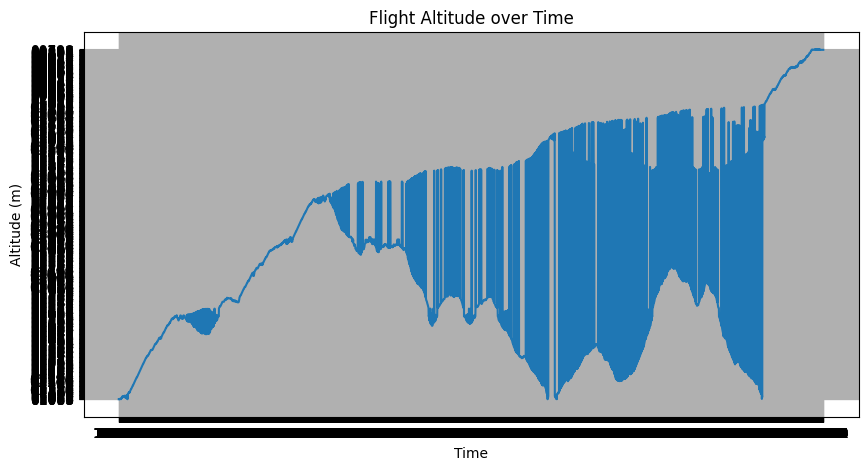

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Altitude'])
plt.xlabel('Time')
plt.ylabel('Altitude (m)')
plt.title('Flight Altitude over Time')
plt.grid(True)
plt.show()
